# Speed Dating 

In this project we analyze the Speed Dating experiment dataset from Kaggle ([Source](https://www.kaggle.com/annavictoria/speed-dating-experiment/data)) to understand what attributes or interests one looks for in a potential partner. 
We also analyze one's perception of what the opposite sex looks for in them and if this experiment affected their confidence.

## Study Summary
Students of Columbia University were recruited to participate in a study ([Study](http://faculty.chicagobooth.edu/emir.kamenica/documents/genderDifferences.pdf))to understand their dating behaviour. 552 students were randomly divided into 21 waves to study different settings. Each student had to fill out a signup form with their personal details and a few questions and a follow-up form after the event to re-evaluate the same questions asked at signup.

Each student spent 4 minutes with every participant of the opposite sex in that wave. They were given a scorecard to rate their partner and give a 'yes' or a 'no' decision at the end of the four minutes.

When both participants say a 'yes' it is considered a 'match'.


##### The dataset has 8379 rows and 169 columns. 

## Key findings

1) Descriptive Analysis Results 

xxxxxxxxxxx

2) Interest Classification on Major and Minor Race Groups

    We found out that for European/Caucasians, two classes in this race group had a high chance of their partner saying yes. One class didn't like exercise but loved clubbing; the other class liked exercise and also liked dining. For the Black and African Americans, those who liked going to museums, regardless of whether they liked or didn't like reading, had a high change of partners saying yes. 
    
3) Attributes Classification on Major and Minor Race Groups

    We found out that your partners' rating on your attractiveness was the most important factor that influenced your partners' decision. For European/Caucasians, if you were attractive and had shared interests, your partners were likely to say yes. For the Black and African Americans, if you were attractive and fun, your partners were likely to say yes.
    
    


##### Other models we tried are: 

*Clustering*<br>
We initially tried clustering to see if we could find any correlations between the different attributes and interests. Kmeans with 3 clusters gave the highest F score, however, the results did not give a relatively clearly-defined clusters.<br><br>

*Random Forest*<br>
We also tried using random forest model to identify the most significant features/interests that could be a determinant for a match. We used the important features that resulted from the model to plot a decision tree to compare against the Kmeans decision tree.<br>

Interest Classification: For the major race group, a person's partner was likely to say yes if he/she dislikes exercise but likes yoga, or likes exercise but was not into tvsports. For minor race group, a person's partner was likely to say yes for those who liked yoga, but disliked tv.<br>

Attributes Classification: For the major race group, attractiveness seemed to be the most determinant feature, as it appeared at the top and at the second level of the tree. Those who were attractive and shared a lot of interests would get a yes from their partners. For the minor race group, attractiveness was still very important, but at a lower value of 5.5 as compared to the major race group (6.5). Those who were attractive and fun would get a yes.<br>

The interests classification yielded a different decision tree for KBest method versus random forest, because the important features selected different interests than Kbest. But the results for attributes classification both gave us the similar results that attractiveness, shared interest, and fun were three most important attributes for a person to get a yes from their partners.<br>

We chose the Kbest results because it gave slightly better gini scores than random forest.

**For detailed documentation on clustering and random forest, please see the Appendix notebook**
 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import io
import requests
import datetime
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

In [2]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.feature_selection as fs
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Speed Dating Data.csv',encoding="ISO-8859-1").rename(columns=lambda x: x.strip())

## Descriptive Analysis

To better understand the partitipants and the nature of the dataset here are few charts :

In [4]:
descrp=data.copy()

In [5]:
#dropping duplicates for each participant 
descrp=descrp.drop_duplicates(subset='iid', keep='first', inplace=False)


##### In the following graphs '0' corresponds to females and '1' corresponds to males.

### a) Number of male and female participants in each wave

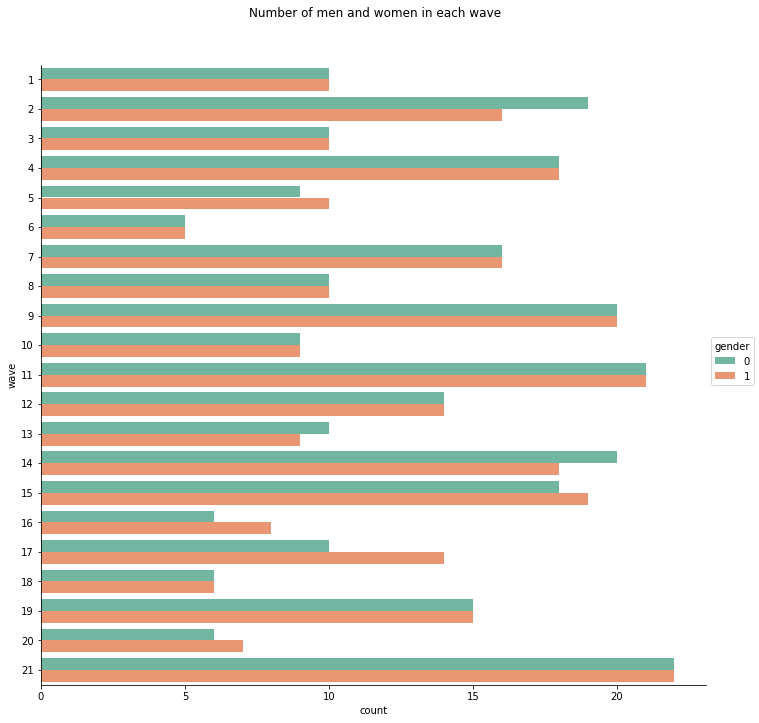

In [6]:
plot1= sns.factorplot(y="wave", hue='gender',data=descrp, size=10, kind="count", palette='Set2'\
                      ,orient='h')
plt.subplots_adjust(top=0.9)
plot1.fig.suptitle('Number of men and women in each wave');

Wave 11 and 21 had the most number of participants.

Most waves had equal number of men and women giving both the genders equal oppurtunity. Some waves like 2, 16, 17 had a disparity in their male and female numbers given one gender more choices to pick from . When the number of women is higher than the number of men then men are considered to have extensive choice and when the number of women is lesser the number of men in that wave then men are considered to have limited choice. This choice might affect ones decision to say yes or no.

### b) Race of the participants

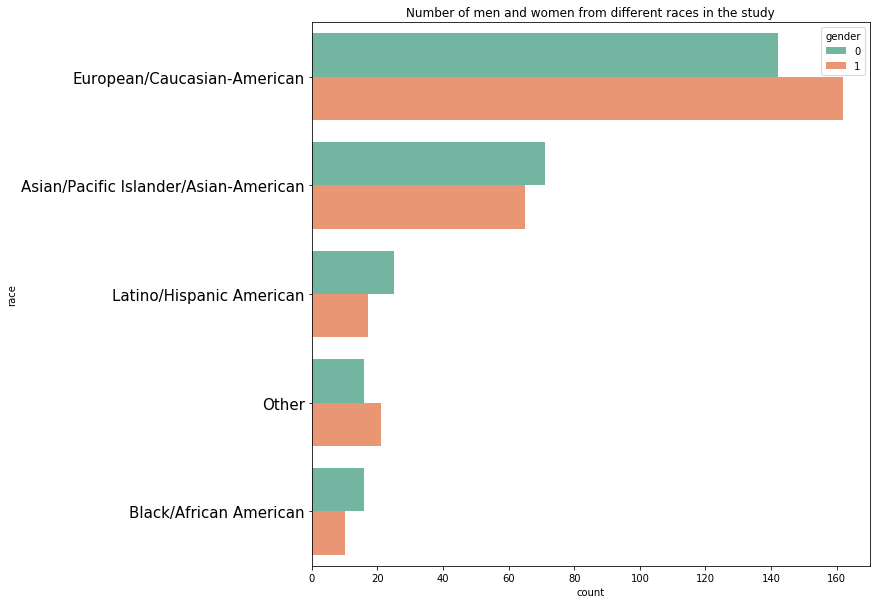

In [7]:
# the diffferent races are 
race=['European/Caucasian-American','Asian/Pacific Islander/Asian-American',\
      'Latino/Hispanic American','Other','Black/African American']
plot2 = plt.figure(figsize=(10,10))
plot2= sns.countplot(y='race',data=descrp, hue='gender',palette='Set2',\
                     order=descrp['race'].value_counts().index) # sorting by the count
plot2.set(yticklabels=race)
plot2.set_title('Number of men and women from different races in the study');
plot2 = plt.yticks(rotation=0,fontsize=15);

The participants of this study were mostly white. It is possible that there isn't a lot of diversity at Columbia university due to the socio-economic status of different races  or the students most of the students who participated in this study were mostly white.
African Americans, Hispanics and Others were the minorities in this study.

More white men participated in this experiment than white women which could imply that white men had fewer options to choose from if race was an important factor for them .

### c) Participant's field of study

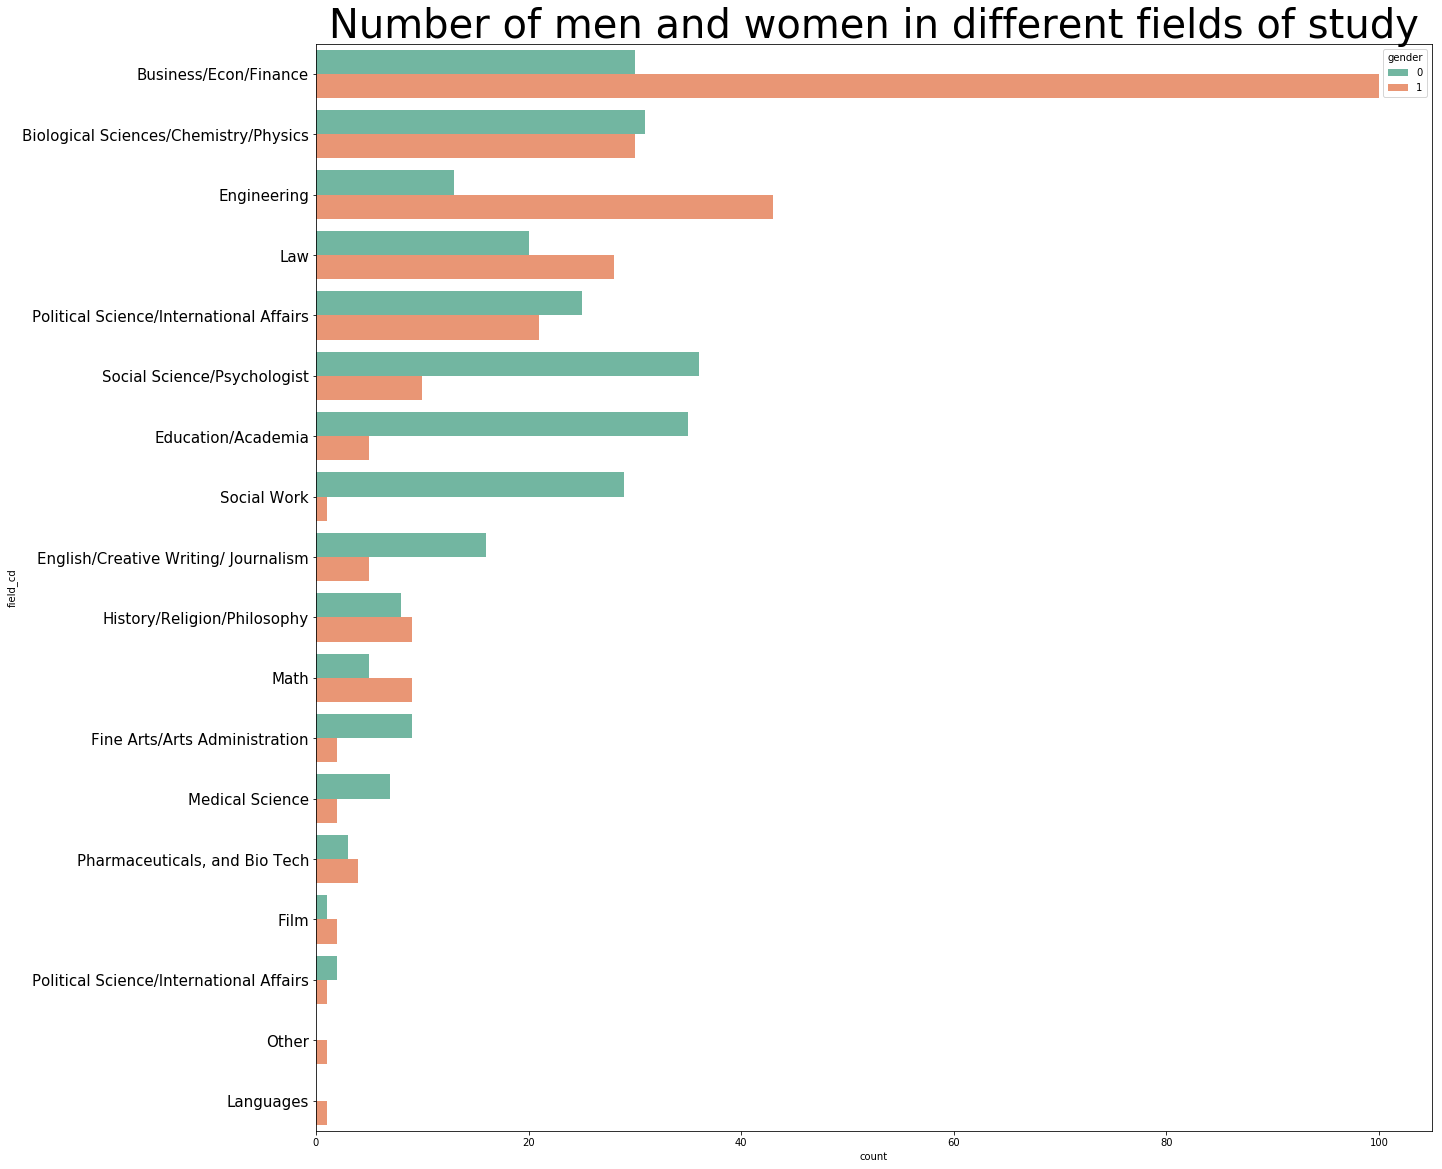

In [8]:
#The fields of study are
field_cd=['Business/Econ/Finance','Biological Sciences/Chemistry/Physics','Engineering','Law',\
          'Political Science/International Affairs','Social Science/Psychologist','Education/Academia'\
          ,'Social Work','English/Creative Writing/ Journalism','History/Religion/Philosophy','Math'\
          ,'Fine Arts/Arts Administration','Medical Science','Pharmaceuticals, and Bio Tech','Film',\
          'Political Science/International Affairs','Other','Languages','Architecture','Undergrad/undecided']

plot3 = plt.figure(figsize=(20,20))
plot3 = sns.countplot(y="field_cd",data=descrp, hue='gender', palette="Set2",\
                      order=descrp['field_cd'].value_counts().index) #sorting
plot3.set(yticklabels=field_cd)
plot3.set_title('Number of men and women in different fields of study', fontsize=40)
plot3 =plt.yticks(rotation=0,fontsize=15);

In [9]:
#field_cd = ['Law','Math','Social/Psy','MedicalScience,Pharmaceuticals,BioTech ',
              #     'Eng','Eglish/Creative Writing/ Journalism','History/Religion/Philosophy',
               #   'Business/Econ/Finance','Education, Academia','Biological Sciences/Chemistry/Physics',
                #  'Social Work','Undergrad/undecided','Political Science/International Affairs',
                 # 'Film','Fine Arts/Arts Administration','Languages','Architecture','Others']

Most of the participants were studying Business/ Economics/ Finance.It is possible than Columbia university is known for its Business school or it is possible that more students from the B- school were informed about this study or were willing to participate.

Most male participants studied Business, Engineering and Law whereas most female participants studied Psychology, Education and Pure Sciences. A stark contrast is seen between male and female participants fields of study.

### d) Activites the participants are interested in

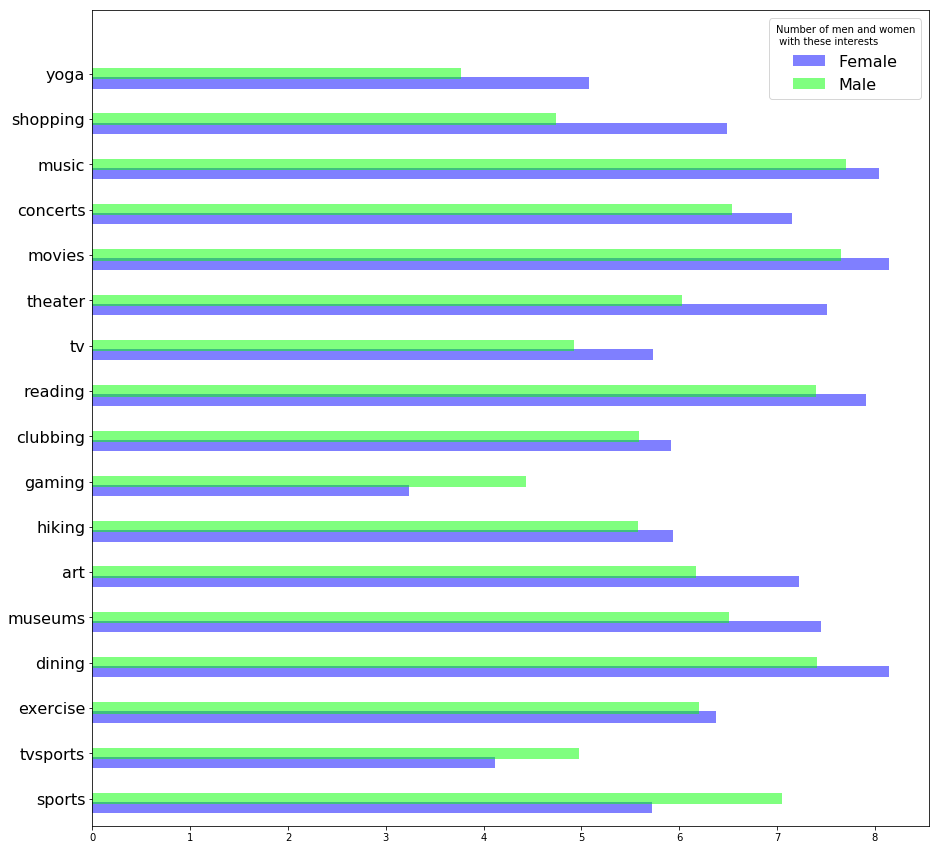

In [10]:
interests=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
intact = descrp.groupby(['gender']).mean()[interests].values

plot4= plt.figure(figsize=(15,15))
plot4= plt.barh(np.arange(0,2*intact.shape[1],2)-0.2,intact[0,:], height=0.5,color=[0,0,1],alpha=0.5,label='Female')
plot4 = plt.barh(np.arange(0,2*intact.shape[1],2)+0.2,intact[1,:], height=0.5,color=[0,1,0],alpha=0.5,label='Male')
plot4 = plt.yticks(np.arange(0,2*intact.shape[1],2)+0.2,interests,fontsize=16)
plot4 = plt.ylim(-1,2*intact.shape[1]+1)
plot4 = plt.legend(loc=0,fontsize=16)
plot4.set_title('Number of men and women\n with these interests');

Music , movies and dining were rated high by women. Yoga , shopping, art, museums are enjoyed more by women.Women have rated most activies higher than men.
Music movies and reading were rated high by men . Men however enjoyed gaming,sports and Tv sports more than women did.

A stark difference is seeing between what men and women like to do esp like shopping and in yoga.

##### Since the dataset has several columns, these descriptive statistics give an overview of the dataset and help us better understand what features of the study we further want to analyse.

### <u>Cleaning data </u>

In [14]:
sd_org=data.copy()

According to the paper, "Seven waves have been omitted: one because we imposed a maximum number of acceptances, two because we were unable to attract sufficient participants, and four because they involved an experimental intervention where participants were asked to bring their favorite book." We identified those 7 waves based data key provided and excluded them.

In [15]:
# select waves that had been used in the paper 
wave=[6,12,16,18,19,20,21]
sd = sd_org[~sd_org['wave'].isin(wave)]


In [16]:
# convert income to numeric values
sd['income'] = sd['income'].str.replace(',', '')
sd['income']= pd.to_numeric(sd['income'])

In [17]:
# drop those colunms for 'half way through' phase 
sd= sd.drop(['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s',
             'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s'],axis=1)

In [18]:
# drop those colunms for 'follow-up 2' phase, becuase these were filled out after 3-4 
# weeks after the event. A lot of them were NaN values and we think that participants 
# might not remember very clearly by that time. 

sd= sd.drop(['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3',
             'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3',
             'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3',
             'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3',
             'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3', 
             'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3',],axis=1)

In [19]:
# drop Q7 from followup phase because it doesn't have a corresponding question in the sign up phase.
sd= sd.drop(['attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2','shar7_2'],axis=1)

In [20]:
# Drop those columns that won't be used in this analysis 
sd= sd.drop(['id', 'idg', 'wave','round','condtn', 'position', 'positin1','partner','pid','int_corr',
             'age_o','race_o','from','zipcode','career','career_c','satis_2','length',
             'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','field',
             'undergra','mn_sat','tuition','exphappy','expnum','numdat_2','samerace',
             'match_es','you_call','them_cal','date_3','numdat_3','num_in_3'],axis=1)

The study was conducted using two different scales. For some waves participants were asked to use 1-10 scale and for other waves they were asked to use 1-100 scale. Hence to analyse these columns, both the scales needed to be normalized.

In [21]:
# group those attributes suing 1-10 scales
ten = ['attr3_1', 'sinc3_1',
       'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1',
       'fun5_1', 'amb5_1','attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2',
       'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2']

# group those attributes using 100 point system
hrd = ['attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1',
       'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1',
       'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr1_2', 'sinc1_2',
       'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2', 
       'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2',
       'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2']

In [22]:
# Normalize two different scales 

# Normalize 10 point scale
sd[ten]=sd[ten].apply(lambda x: ((x-1)/9))

# Normalize 100 point scale
sd[hrd]=sd[hrd].apply(lambda x: x/100)

#### Finally the columns we wish to analyze are:


In [23]:
# final columns to keep 
sd.columns

Index(['iid', 'gender', 'order', 'match', 'dec_o', 'attr_o', 'sinc_o',
       'intel_o', 'fun_o', 'amb_o',
       ...
       'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2',
       'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'],
      dtype='object', length=106)

## Finding 1: Comparison between  SIGNUP vs FOLLOWUP questions

Since the same set of questions were asked at signup and followup , we felt like this was something worth exploring. We wanted to see if a participant's (male and female) perception of what they were looking for in the opposite sex, what the opposite sex was looking for and how well they measured up to these expectations varied before and after the speed dating event.

### a) What do you look for in the opposite sex SIGNUP vs FOLLOWUP

Six attributes were asked to be ranked by each participant: Attractive, Sincere, Intelligent, Fun, Ambitious and Shared Interests.
We wanted to know which attributes were given the most points by men and women at signup and followup to see if there were any differences in the gender or the two different times of the experiment.

#### Description of columns

| Column | Description |
|--------|-------------|
|`iid`|unique subject number|
|`gender`|Female=0	Male=1|
|      __Columns for  Signup__         |
|`attr1_1`| Attractive|
|`sinc1_1`| Sincere|
|`intel1_1`| Intelligent|
|`fun1_1`| Fun	|
|`amb1_1`| Ambitious	|
|`shar1_1`|Shared Interests|
|      __Columns for  Followup__         |
|`attr1_2`|Attractive|
|`sinc1_2`|Sincere|
|`intel1_2`|Intelligent	|
|`fun1_2`|Fun	|
|`amb1_2`|Ambitious	|
|`shar1_2`|Shared Interests|

In [24]:
#picking columns for the attributes from q1
signup=sd[['iid','gender','attr1_1','sinc1_1','intel1_1','fun1_1',\
        'amb1_1','shar1_1']]
followup=sd[['iid','gender','attr1_2','sinc1_2','intel1_2','fun1_2',\
        'amb1_2','shar1_2']]



In [25]:
#dropping any null values
signup=signup.dropna(axis=0,how='any')

followup=followup.dropna(axis=0,how='any')


In [26]:
#each participant filled out only one form at signup and followup , but met multiple people,
#hence the form values were duplicated in the dataset

#removing duplicate values
signup=signup.drop_duplicates(subset=None, keep='first', inplace=False)

followup=followup.drop_duplicates(subset=None, keep='first', inplace=False)


In [27]:
#melting the dataset to transfrom the 6 columns into 1 to plot a graph
signupmelt=pd.melt(signup,id_vars=['gender'], value_vars=['attr1_1','sinc1_1','intel1_1','fun1_1',\
        'amb1_1','shar1_1'], var_name ='Attributes', value_name = 'AttributeValue')


followupmelt=pd.melt(followup,id_vars=['gender'], value_vars=['attr1_2','sinc1_2','intel1_2','fun1_2',\
        'amb1_2','shar1_2'], var_name ='Attributes', value_name = 'AttributeValue')


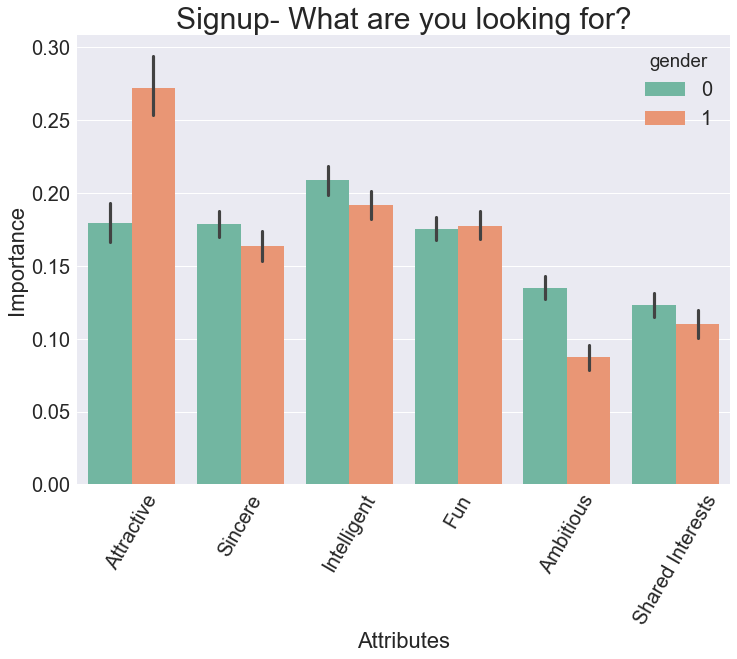

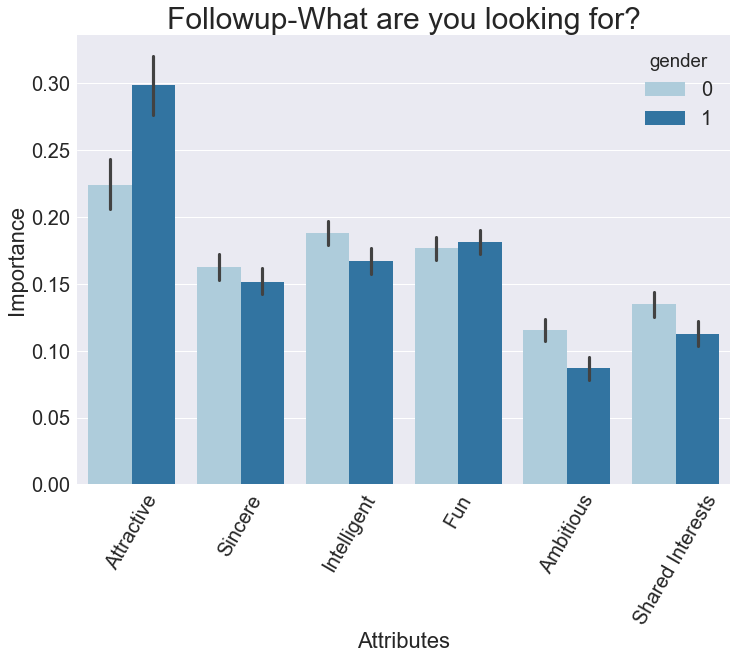

In [28]:
#plotting the highest rated attribute for signup and follow up

sns.set(font_scale = 2) #increasing the plot size
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


plot5 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=signupmelt ,palette="Set2")
plot5.set(xlabel='Attributes', ylabel='Importance')
plot5.set_title("Signup- What are you looking for?",fontsize=30)
plot5.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interests'])#renaming the x axis ticks
plot5.set_xticklabels(plot5.get_xticklabels(),rotation=60)
plt.show();



#plotting the followup data
a4_dims = (11.7, 8.27) 
fig, ax = pyplot.subplots(figsize=a4_dims) 

plot6 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=followupmelt, palette="Paired")
plot6.set(xlabel='Attributes', ylabel='Importance')
plot6.set_title("Followup-What are you looking for?", fontsize=30)
plot6.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interests']) 
plot6.set_xticklabels(plot6.get_xticklabels(),rotation=60)
plt.show();

At Signup, men rated attractiveness as the most important feature. Whereas, women rated intelligent as the most desired feature. Women clearly seemed to care more about intelligence and ambition than men. For women, sincerity was as important as attractiveness. Men rated ambition the lowest which implied that they were not looking for someone very ambitious. There was a huge disparity in scores for the 6 attributes rated by men whereas women gave all of the attributes more or less equal rating. 

At followup, men still rated attractiveness as the most desired attribute giving the other attributes less scores. However, interestingly women rated attractiveness more than intelligence in the followup. Similarly, their sincerity and ambitious ratings dropped. This could be because either 4 minutes was very little time to know how genuine or intelligent/ambitious a person was; and they decided to say yes or no depending on what they could physically see (attractive). It was also possible women realized that no matter how intelligent or sincere a guy was, but if he was not good looking he might not be considered. Or else, it could be that the more ambitious/intelligent a guy was, the less his desirability was, because he could have been boastful.

While comparing signup and followup, we see men had been more or less consistent with their ratings. They rated attractiveness higher and ambition lower at followup. Whereas, women seemed to have realized that they care about a partner's attractivness more in a speed dating setup than the other attributes. Men and women both rated fun equally at signup and followup. Our findings were consistent with the results from the research paper.


__Men and women are looking for someone attractive and fun. We decided to further analyse this. This is the basis for our finding 2&3.__

### Feature Selection for Men and Women at SIGNUP vs FOLLOWUP

We wanted to see what were the most significant features or attributes in determining one's desirability. To do so we used KBest method for feature selection for both the phases.

#### Men

In [29]:
male=sd[sd.gender==1]

In [30]:
malesignup=male[['match','attr1_1','sinc1_1','intel1_1','fun1_1',\
        'amb1_1','shar1_1']]
malefollowup=male[['match','attr1_2','sinc1_2','intel1_2','fun1_2',\
        'amb1_2','shar1_2']]

In [31]:
malesignup=malesignup.dropna(axis=0,how='any')
malefollowup=malefollowup.dropna(axis=0,how='any')

In [32]:
X1, y1 = malesignup.drop(['match'], axis=1), malesignup['match']
X2, y2 = malefollowup.drop(['match'], axis=1), malefollowup['match']

In [33]:
#signup
kb = fs.SelectKBest(k=3)
kb.fit(X1, y1)  
names = X1.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

#Sorting the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)



SelectKBest(k=3, score_func=<function f_classif at 0x10f4442f0>)

  Feat_names  F_Scores
1    sinc1_1  7.777656
2    shar1_1  4.201647
0    attr1_1  3.609222


Since the F scores were close, sincerity for men didn't seem like a signigicant feature to analyse.

In [36]:
#followup
kb = fs.SelectKBest(k=3)
kb.fit(X2, y2)
names = X2.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

#Sorting the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=3, score_func=<function f_classif at 0x10f4442f0>)

  Feat_names  F_Scores
1     fun1_2  14.42849
2     amb1_2   1.58611
0    sinc1_2   1.27101


Fun had a high F score which indicated that this was a significant feature and could be used for further analysis.

#### Women

In [37]:
female=sd[sd.gender==0]

In [38]:
femalesignup=female[['match','attr1_1','sinc1_1','intel1_1','fun1_1',\
        'amb1_1','shar1_1']]

femalefollowup=female[['match','attr1_2','sinc1_2','intel1_2','fun1_2',\
        'amb1_2','shar1_2']]

In [39]:
femalesignup=femalesignup.dropna(axis=0,how='any')
femalefollowup=femalefollowup.dropna(axis=0,how='any')

In [40]:
X3,y3= femalesignup.drop(['match'], axis=1), femalesignup['match']
X4, y4 = femalefollowup.drop(['match'], axis=1), femalefollowup['match']

In [41]:
kb = fs.SelectKBest(k=3)
kb.fit(X3, y3)  
names = X3.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=3, score_func=<function f_classif at 0x10f4442f0>)

  Feat_names  F_Scores
2    shar1_1  8.660441
1     fun1_1  6.705976
0   intel1_1  1.303869


For women, even though shared interests was the most significant, the F scores for the other attributes were closer in value.

In [43]:
kb = fs.SelectKBest(k=3)
kb.fit(X4, y4) 
names = X4.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=3, score_func=<function f_classif at 0x10f4442f0>)

  Feat_names   F_Scores
1     fun1_2  12.409752
2     amb1_2   5.905993
0    sinc1_2   0.461899


Fun for women during followup, similar to men, seemed to be the most significant with the highest F score.

__Whether a participant rated their partner as fun or not primarily would depend on if they had shared interests.__ A museum goer might not consider their partner fun if they didn't enjoy going to the museums or enjoy arts as they did. Similary someone who enjoyed the outdoors, like hiking might not rate someone who was into reading as fun.

This was a very interesting insight and we decided to analyse this feature further. Check Finding 3.

### b) What do you think the opposite sex looks for SIGNUP vs FOLLOWUP?

We were curious to know if the participants knew what the opposite sex was looking for. And did their perception change before and after the meeting.

#### Description of columns

| Column | Description |
|--------|-------------|
|`iid`|unique subject number|
|`gender`|Female=0	Male=1|
|      __Columns for  Signup__         |
|`attr2_1`| Attractive |
|`sinc2_1`| Sincere|
|`intel2_1`| Intelligent|
|`fun2_1`| Fun	|
|`amb2_1`| Ambitious	|
|`shar2_1`|Shared Interests|
|      __Columns for  Followup__         |
|`attr2_2`|Attractive|
|`sinc2_2`|Sincere|
|`intel2_2`|Intelligent	|
|`fun2_2`|Fun	|
|`amb2_2`|Ambitious	|
|`shar2_2`|Shared Interests|

In [44]:
#picking columns for the attributes from question 2
signup2=sd[['iid','gender','attr2_1','sinc2_1','intel2_1','fun2_1',\
        'amb2_1','shar2_1']]
followup2=sd[['iid','gender','attr2_2','sinc2_2','intel2_2','fun2_2',\
        'amb2_2','shar2_2']]

In [45]:
#dropping any null values
signup2=signup2.dropna(axis=0,how='any')

followup2=followup2.dropna(axis=0,how='any')


In [46]:
#each participant filled out only one form at signup and followup , but met multiple people,
#hence the form values were duplicated in the dataset

#removing duplicate valyes
signup2=signup2.drop_duplicates(subset=None, keep='first', inplace=False)

followup2=followup2.drop_duplicates(subset=None, keep='first', inplace=False)



In [47]:
#melting the dataset to transfrom the 6 columns into 1
signupmelt2=pd.melt(signup2,id_vars=['gender'], value_vars=['attr2_1','sinc2_1','intel2_1','fun2_1',\
        'amb2_1','shar2_1'], var_name ='Attributes', value_name = 'AttributeValue')


followupmelt2=pd.melt(followup2,id_vars=['gender'], value_vars=['attr2_2','sinc2_2','intel2_2','fun2_2',\
        'amb2_2','shar2_2'], var_name ='Attributes', value_name = 'AttributeValue')


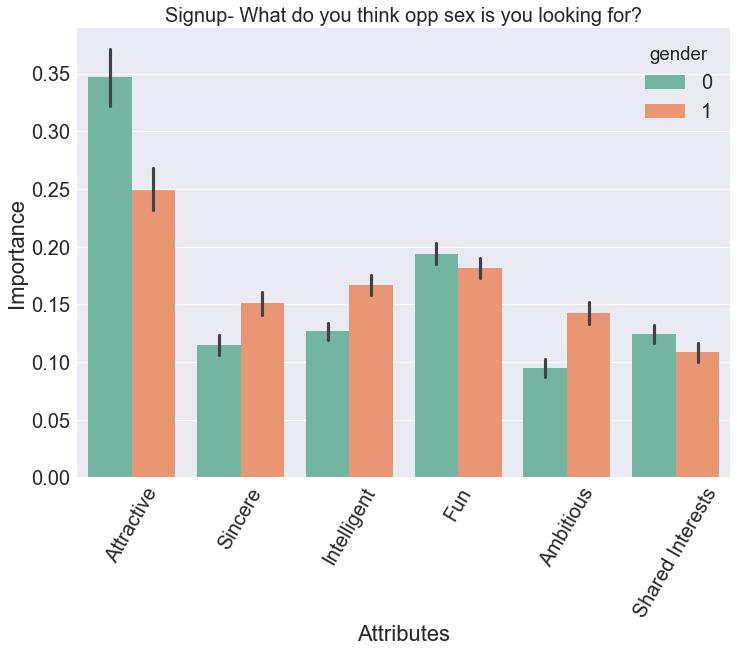

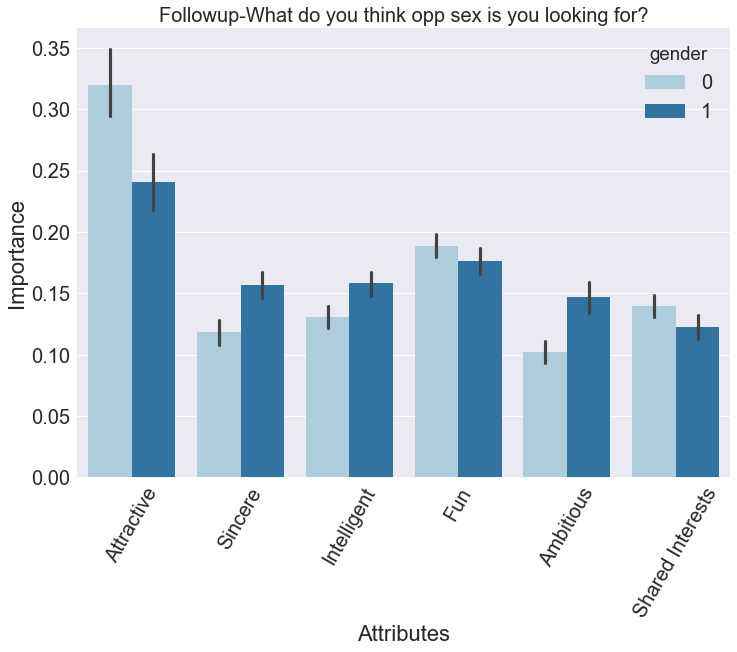

In [48]:
#plotting the highest rated attribute for signup and follow up

sns.set(font_scale = 2) #increasing the plot size
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


plot7 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=signupmelt2,palette="Set2")
plot7.set(xlabel='Attributes', ylabel='Importance')
plot7.set_title("Signup- What do you think opp sex is you looking for?",fontsize=20)
plot7.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interests'])#renaming the x axis ticks
plot7.set_xticklabels(plot7.get_xticklabels(),rotation=60)
plt.show();



#plotting the followup data
a4_dims = (11.7, 8.27) 
fig, ax = pyplot.subplots(figsize=a4_dims) 

plot8 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=followupmelt2, palette="Paired")
plot8.set(xlabel='Attributes', ylabel='Importance')
plot8.set_title("Followup-What do you think opp sex is you looking for?",fontsize=20)
plot8.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious','Shared Interests']) 
plot8.set_xticklabels(plot8.get_xticklabels(),rotation=60)
plt.show();

It would be interesting to see if one's perception of what the opposite sex wanted was correct and if it changed at all after the meeting. To do so we can look at the table below to see what scores(out of 100) did the participants give and what the opposite sex thought they wanted.
__Values in bold are worth noting as they show a difference in perception.__


|Columms for  Signup| WHAT WOMEN WANTED | WHAT MEN THOUGHT |    | WHAT MEN WANTED | WHAT WOMEN THOUGHT |
|-------------------|-------------------|------------------|    |-----------------|--------------------|
|`Attractive`|__~27__|__~35__|                                        |__~17__|__~25__|
|`Sincere`|__~16__|__~11__|                                            |__~21__|__~15__|
|`Intelligent`|__~19__|__~13__|                                        |__~21__|__~17__|
|`Fun`| ~18|~20|                                                | ~17|~19|
|`Ambitious`|~9|~10|                                            | ~14|~14|
|`Shared Interests`|~11|~13|                                    | ~13|~11|

|Columms for  Followup| WHAT WOMEN WANTED | WHAT MEN THOUGHT |  | WHAT MEN WANTED | WHAT WOMEN THOUGHT | 
|-------------------|-------------------|------------------|    |-----------------|--------------------|
|`Attractive`|__~17__|__~25__|                                          |~23|~24|
|`Sincere`|~17|~15|                                             |~16|~16|
|`Intelligent`|__~21__|__~17__|                                         |~18|~16|
|`Fun`|~17|~19|                                                 |~18|~18|
|`Ambitious`|~14|~14|                                           |~11|~15|
|`Shared Interests`|~13|~11|                                    |~14|~11|

During Signup, men thought women cared more about attractiveness and less about their intelligence and sincerity than what women actually desired in question 1. It is natural for men to give attractiveness lot of weightage since it was so important to them.
Women, however, seemed to have ranked attractiveness a little higher and, sincerity and intelligence lower than what men wanted in question 1.They were aware than men didn't want women who were very intelligent or ambitious.

During Followup, women guessed the scores similar to what their counterparts ranked in question 1. It is possible they knew this for sure after their meetings , because they might have asked the opposite sex what they were looking for directly or it might have come up during the conversation that gave them this impression. Men however, still thought women cared about attractiveness more than anything else. This also showed that women were better observers/listeners in comparison to men.


__Men are from Mars, women are from Venus:__These comparisons helped in understanding how well we know the opposite sex. Yes it was true that preferences within gender may vary drastically from one person to another, but these values showed that how we underestimate or overestimate an attribute that might be important to the other gender, based on the preferences of our own gender. 

If one managed to crack the code for what the opposite gender wants, it could help them work on themselves, making them more desirable. Our next finding was based on this idea.

 ### c) How do measure up SIGNUP vs FOLLOWUP?

Finally, we wanted to know what the participants thought of themselves. And did this change after the meeting.

#### Description of columns

| Column | Description |
|--------|-------------|
|`iid`|unique subject number|
|`gender`|Female=0	Male=1|
|      __Columns for  Signup__       |
|`attr3_1`| Attractive |
|`sinc3_1`| Sincere|
|`intel3_1`| Intelligent|
|`fun3_1`| Fun	|
|`amb3_1`| Ambitious	|
|`shar3_1`|Shared Interests|
|      __Columns for  Followup__         |
|`attr3_2`|Attractive|
|`sinc3_2`|Sincere|
|`intel3_2`|Intelligent	|
|`fun3_2`|Fun	|
|`amb3_2`|Ambitious	|
|`shar3_2`|Shared Interests|

In [49]:
#picking columns for the attributes from question 2
signup3=sd[['iid','gender','attr3_1','sinc3_1','intel3_1','fun3_1',\
        'amb3_1']]
followup3=sd[['iid','gender','attr3_2','sinc3_2','intel3_2','fun3_2',\
        'amb3_2']]

In [50]:
#dropping any null values
signup3=signup3.dropna(axis=0,how='any')

followup3=followup3.dropna(axis=0,how='any')

In [51]:
#each participant filled out only one form at signup and followup , but met multiple people,
#hence the form values were duplicated in the dataset

#removing duplicate valyes
signup3=signup3.drop_duplicates(subset=None, keep='first', inplace=False)

followup3=followup3.drop_duplicates(subset=None, keep='first', inplace=False)

In [52]:
#melting the dataset to transfrom the 6 columns into 1
signupmelt3=pd.melt(signup3,id_vars=['gender'], value_vars=['attr3_1','sinc3_1','intel3_1','fun3_1',\
        'amb3_1'], var_name ='Attributes', value_name = 'AttributeValue')


followupmelt3=pd.melt(followup3,id_vars=['gender'], value_vars=['attr3_2','sinc3_2','intel3_2','fun3_2',\
        'amb3_2'], var_name ='Attributes', value_name = 'AttributeValue')



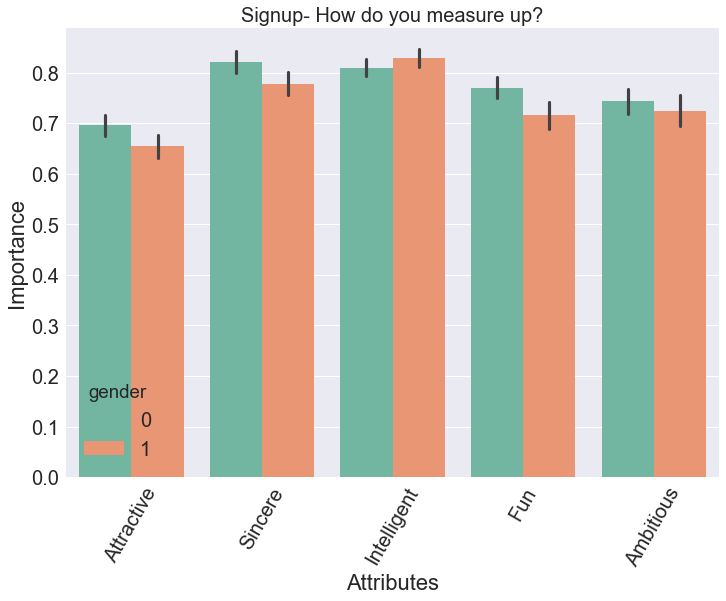

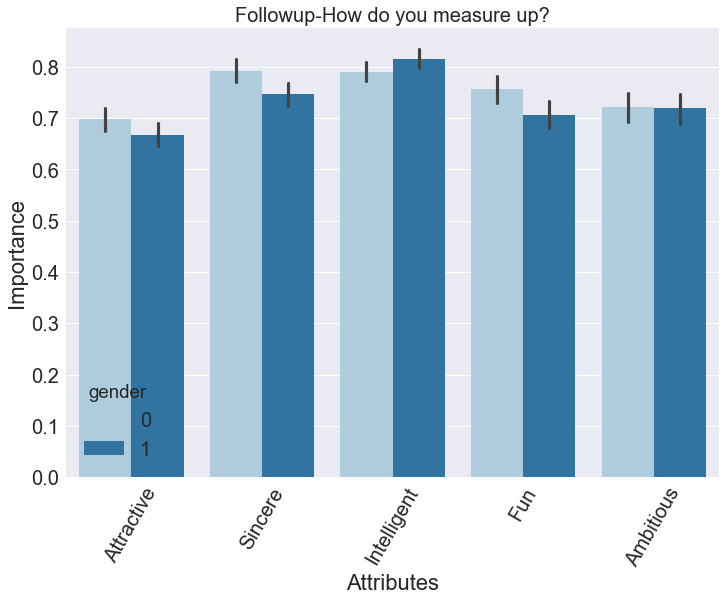

In [53]:
#plotting the highest rated attribute for signup and follow up

#sns.set(font_scale = 2) #increasing the plot size
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


plot9 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=signupmelt3,palette="Set2")
plot9.set(xlabel='Attributes', ylabel='Importance')
plot9.set_title("Signup- How do you measure up?",fontsize=20)
plot9.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious'])#renaming the x axis ticks
plot9.set_xticklabels(plot9.get_xticklabels(),rotation=60)

plt.show();



#plotting the followup data
a4_dims = (11.7, 8.27) 
fig, ax = pyplot.subplots(figsize=a4_dims) 

plot10 = sns.barplot(x="Attributes", y="AttributeValue", hue="gender", data=followupmelt3, palette="Paired")
plot10.set(xlabel='Attributes', ylabel='Importance')
plot10.set_title("Followup-How do you measure up?",fontsize=20)
plot10.set_xticklabels(['Attractive','Sincere','Intelligent','Fun','Ambitious']) 
plot10.set_xticklabels(plot10.get_xticklabels(),rotation=60)

plt.show();

Men and women seemed to be equally confident before and after the meeting. They rated themselves 7+ in all the attributes for both phases. Women considered sincerity as their highest rated attribute, whereas men considered themselves to be very intelligent.

It was interesting to see that men and women both rated their attractiveness the least. This could be because either they were trying to be modest or it's possible the participants were very self critical about their physical appearance.

Women generally seemed to be more confident than men except for intelligence. The differences weren't huge, but this could be because of their field of study. 

## Finding 2: Interests Classification

We wanted to see how your interests influence your partner's decision. We did this on two race groups to find out whether the interests that got you partner to say yes changed among different races. 

#### Description of the columns <br><br>


| Column | Description |
|--------|-------------|
|`dec_o`|1 = yes, 0 = no|
|`sports`|scale of 1-10|
|`tvsports`| scale of 1-10|
|`exercise`| scale of 1-10|
|`dining`| scale of 1-10|
|`museums`| scale of 1-10|
|`art`| scale of 1-10|
|`hiking`| scale of 1-10|
|`gaming`|scale of 1-10|
|`clubbing`|scale of 1-10|
|`reading`|scale of 1-10|
|`tv`|scale of 1-10|
|`theater`|scale of 1-10|
|`movies`|scale of 1-10|
|`music`|scale of 1-10|
|`shopping`|scale of 1-10|
|`yoga`|scale of 1-10|



In [54]:
# select interests
interest = ['dec_o','sports','tvsports','exercise','dining','museums','art','hiking',
            'gaming','clubbing','reading','tv','theater','movies','music','shopping',
            'yoga']

Classification over interest on major race group: European/Caucasian-American


In [55]:
# include waves 1-14
# Majority group & interest 
wave_m_i = sd[sd['race']==2].loc[:, interest]

In [56]:
# check how many rows we have 
len(wave_m_i)
# see if there is any NaN values
wave_m_i.isnull().sum()

3654

dec_o        0
sports      16
tvsports    16
exercise    16
dining      16
museums     16
art         16
hiking      16
gaming      16
clubbing    16
reading     16
tv          16
theater     16
movies      16
music       16
shopping    16
yoga        16
dtype: int64

In [57]:
# drop all NaN values
wave_m_i=wave_m_i.dropna(axis=0, how='any')

In [58]:
# define our X and y
X_m_i, y_m_i = wave_m_i.drop(['dec_o'], axis=1), wave_m_i['dec_o']

kb = fs.SelectKBest(k=5)
kb.fit(X_m_i, y_m_i)

names = X_m_i.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=5, score_func=<function f_classif at 0x10f4442f0>)

  Feat_names   F_Scores
0   exercise  28.897477
1     dining  21.748872
2   clubbing  18.565484
4   shopping  16.132498
3    reading  12.118425


In [59]:
# best interests according to kbest
interest_best = ['dec_o','dining','clubbing','shopping','exercise','reading']

wave_m_i = sd[sd['race']==2].loc[:, interest_best]

In [60]:
wave_m_i=wave_m_i.dropna(axis=0, how='any')

In [61]:
# define X and y
X_m_i, y_m_i = wave_m_i.drop(['dec_o'], axis=1), wave_m_i['dec_o']
# to see the distribution of y 
len(wave_m_i[wave_m_i['dec_o']==1])
len(wave_m_i[wave_m_i['dec_o']==0])

1664

1974

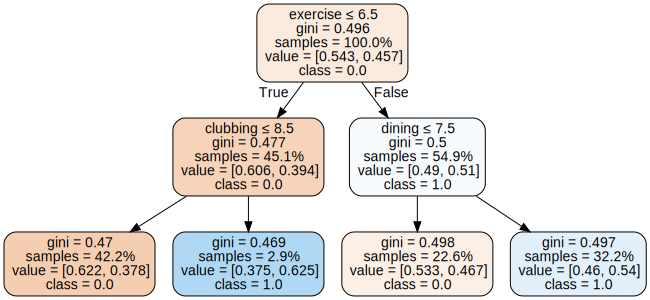

In [62]:
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_m_i, y_m_i)
import graphviz
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_m_i.columns),                     
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

We saw that for the major race group, those who didnt’t like exercise but were into clubbing got a high possibitiy of yes from partners, same with those who liked exercise and liked dining out. Ginis were not very good here. We will try to improve them later. 

Classification over interest on minor race group: Black/African American

In [63]:
wave_n_i = sd[(sd['race']==1)].loc[:, interest]

In [64]:
wave_n_i=wave_n_i.dropna(axis=0, how='any')

X_n_i, y_n_i = wave_n_i.drop(['dec_o'], axis=1), wave_n_i['dec_o']

kb = fs.SelectKBest(k=5)
kb.fit(X_n_i, y_n_i)

SelectKBest(k=5, score_func=<function f_classif at 0x10f4442f0>)

In [65]:
# list out the 5 interests that Kbest chose
names = X_n_i.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

  Feat_names   F_Scores
2     hiking  36.192543
0    museums  17.223820
1        art  13.870620
4       yoga   8.376817
3    reading   8.220813


In [66]:
# best interests according to kbest
interest_best = ['dec_o','hiking','museums','art','reading','yoga']
wave_n_i = sd[(sd['race']==1)].loc[:, interest_best]

In [67]:
wave_n_i=wave_n_i.dropna(axis=0, how='any')

In [68]:
# define X and y
X_n_i, y_n_i = wave_n_i.drop(['dec_o'], axis=1), wave_n_i['dec_o']
# to see the distribution of y
len(wave_n_i[wave_n_i['dec_o']==1])
len(wave_n_i[wave_n_i['dec_o']==0])

143

218

In [69]:
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_n_i, y_n_i)

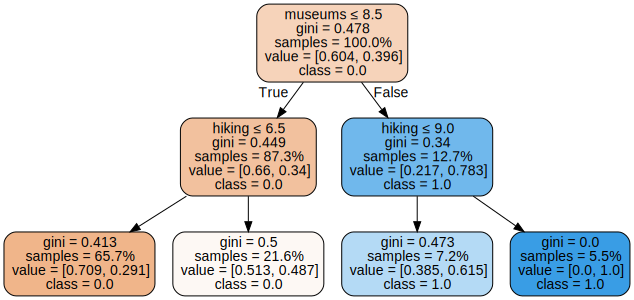

In [70]:
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_n_i.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

The decision tree showed that those who liked going to museums would get a match, regardless of whether they liked or didn’t like reading. We got a pure class here, which was those who loved museums and were not super into reading. They would 'defenitely' get a yes.


## Finding 3: Attributes Classification

We did the same thing over attributes to see how your partner's rating on you influence his/her decision. We also did this on two race groups to find out whether the attributes that got you partner to say yes changed among different races. 

Classification over attributes on major race group: European/Caucasian-American

In [71]:
attributes=['dec_o','gender','attr_o', 'sinc_o', 'intel_o','fun_o', 
            'amb_o', 'shar_o','prob_o','met_o']

In [72]:
wave_m_a = sd[sd['race']==2].loc[:, attributes]

In [73]:
wave_m_a=wave_m_a.dropna(axis=0, how='any')

In [74]:
# define X and y
X_m_a, y_m_a = wave_m_a.drop(['dec_o'], axis=1), wave_m_a['dec_o']

In [75]:
kb = fs.SelectKBest(k=4)
kb.fit(X_m_a, y_m_a)

names = X_m_a.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=4, score_func=<function f_classif at 0x10f4442f0>)

  Feat_names    F_Scores
0     attr_o  918.213659
1      fun_o  643.311543
2     shar_o  553.036362
3     prob_o  341.224529


In [76]:
# best attributes according to kbest
attributes_best = ['dec_o','attr_o','fun_o', 'shar_o','prob_o']

In [77]:
wave_m_a = sd[sd['race']==2].loc[:, attributes_best]

In [78]:
wave_m_a=wave_m_a.dropna(axis=0, how='any')

In [79]:
X_m_a, y_m_a = wave_m_a.drop(['dec_o'], axis=1), wave_m_a['dec_o']
# distribution of y
len(wave_m_a[wave_m_a['dec_o']==1])
len(wave_m_a[wave_m_a['dec_o']==0])

1447

1630

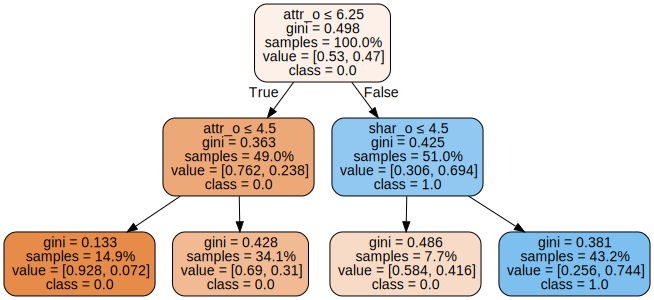

In [80]:
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_m_a, y_m_a)

dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_m_a.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

Classification over attributes on minor race group: Black/African American

In [81]:
wave_n_a = sd[(sd['race']==1)].loc[:, attributes]

In [82]:
wave_n_a=wave_n_a.dropna(axis=0, how='any')
# define X and y
X_n_a, y_n_a = wave_n_a.drop(['dec_o'], axis=1), wave_n_a['dec_o']

In [83]:
kb = fs.SelectKBest(k=4)
kb.fit(X_n_a, y_n_a)

names = X_n_a.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=4, score_func=<function f_classif at 0x10f4442f0>)

  Feat_names   F_Scores
0     attr_o  61.687932
1      fun_o  50.253904
2     shar_o  44.618446
3     prob_o  29.139577


In [84]:
# best attributes according to kbest
attributes_best = ['dec_o','attr_o','fun_o', 'shar_o','prob_o']
wave_n_a = sd[(sd['race']==1)].loc[:, attributes_best]

In [85]:
wave_n_a=wave_n_a.dropna(axis=0, how='any')

In [86]:
# define X and y
X_n_a, y_n_a = wave_n_a.drop(['dec_o'], axis=1), wave_n_a['dec_o']
# distribution of y
len(wave_n_a[wave_n_a['dec_o']==1])
len(wave_n_a[wave_n_a['dec_o']==0])

127

191

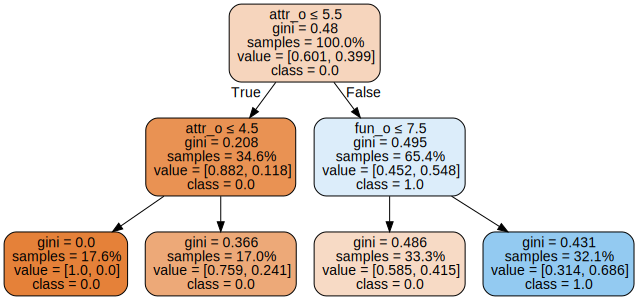

In [87]:
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_n_a, y_n_a)


dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_n_a.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

The results suggested that attractiveness was the most important trait that would get you a yes; specifically, if you were attractive and had shared interests, this would get you a yes. For the minority group, if you were attractive and fun, you would get a yes.

As we saw the ginis for interest classification on the major race group were all close to 0.5. In order to get better classification, we will further divide the major race group into people who rated exercise greater than 6.5 and those less or equal to 6.5. Then run the classification on attributes. 

In [88]:
# major race group who rated exercise >= 6.5
exercise = sd[(sd['race']==2) & (sd['exercise']>6.5)]
# major race group who rated exercise < 6.5
exercise1 = sd[(sd['race']==2) & (sd['exercise']<=6.5)]

In [89]:
exercise=exercise.loc[:, attributes]

In [90]:
exercise=exercise.dropna(axis=0, how='any')

In [91]:
X_m_e, y_m_e = exercise.drop(['dec_o'], axis=1), exercise['dec_o']

In [92]:
kb = fs.SelectKBest(k=4)
kb.fit(X_m_e, y_m_e)

names = X_m_e.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=4, score_func=<function f_classif at 0x10f4442f0>)

  Feat_names    F_Scores
0     attr_o  404.735121
1      fun_o  319.200852
2     shar_o  284.468469
3     prob_o  215.488513


In [93]:
attributes_best = ['dec_o','attr_o','fun_o', 'shar_o','prob_o']
exercise =exercise.loc[:, attributes_best]

In [94]:
exercise=exercise.dropna(axis=0, how='any')

In [95]:
X_m_e, y_m_e = exercise.drop(['dec_o'], axis=1), exercise['dec_o']

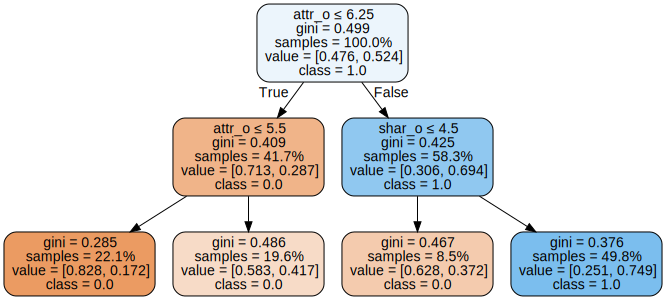

In [96]:
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_m_e, y_m_e)


dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_m_e.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

Ginis did not improve much compared to the result using all major race data. Classes did't change either: attractiveness was still the most prominent variable here, then shared interests. Next we will look at major race group who rated exercise less than 6.5.

In [98]:
exercise1=exercise1.loc[:, attributes]
exercise1=exercise1.dropna(axis=0, how='any')
X_m_e, y_m_e = exercise1.drop(['dec_o'], axis=1), exercise1['dec_o']
kb = fs.SelectKBest(k=4)
kb.fit(X_m_e, y_m_e)

names = X_m_e.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=4, score_func=<function f_classif at 0x10f4442f0>)

  Feat_names    F_Scores
0     attr_o  466.204979
1      fun_o  296.326366
2     shar_o  249.156106
3     prob_o  121.010853


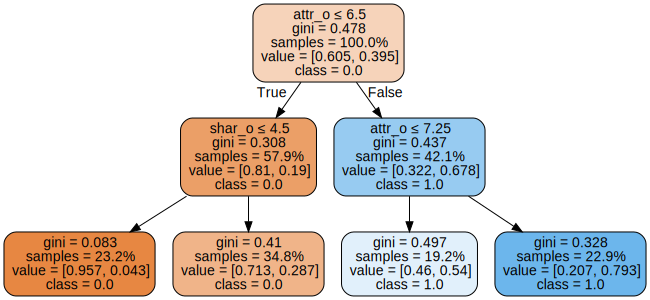

In [99]:
attributes_best = ['dec_o','attr_o','fun_o', 'shar_o','prob_o']
exercise1 =exercise1.loc[:, attributes_best]
exercise1=exercise1.dropna(axis=0, how='any')
X_m_e, y_m_e = exercise1.drop(['dec_o'], axis=1), exercise1['dec_o']
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_m_e, y_m_e)


dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_m_e.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

Ginis improved a little bit compared to the result using all major race data. Now we can see for major race group, if you don't like exercise that much, attrictiveness is the ultimate variable that determines your partner's decision.

Now we are going to do the same thing to minor race group. We will divide this group according to their museum rating to one group less or equal to 8.5 and another one greater than 8.5.

In [108]:
# minor race group who rated museum > 8.5
museum = sd[(sd['race']==1) & (sd['museums']>8.5)]
# minor race group who rated museum <= 8.5
museum1 = sd[(sd['race']==1) & (sd['museums']<=8.5)]

In [109]:
museum =museum.loc[:, attributes]
museum =museum.dropna(axis=0, how='any')
X_n_e, y_n_e = museum.drop(['dec_o'], axis=1), museum['dec_o']
kb = fs.SelectKBest(k=4)
kb.fit(X_n_e, y_n_e)

names = X_n_e.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=4, score_func=<function f_classif at 0x10f4442f0>)

  Feat_names  F_Scores
1    intel_o  4.215558
3      amb_o  1.277549
2      fun_o  1.087562
0     sinc_o  0.301414


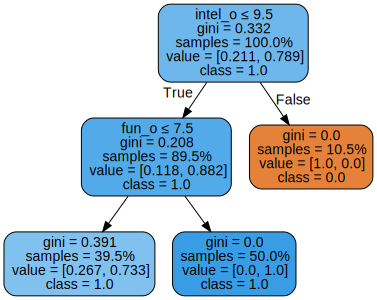

In [110]:
attributes_best = ['dec_o','attr_o','fun_o', 'shar_o','intel_o']
museum =museum.loc[:, attributes_best]
museum=museum.dropna(axis=0, how='any')
X_n_e, y_n_e = museum.drop(['dec_o'], axis=1), museum['dec_o']
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_n_e, y_n_e)


dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_n_e.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

We had a very different classification here for minor race group who rated museums greater than 8.5. If you were super intelligent, you definitely would not get a yes from your partner. If you were not that intelligent, and were rated above 7.5 on fun, you would definitely get a yes from your partner; and even if you were rated not that fun, your chance of getting a yes was still high. This was consistent with our finding 1. We could say museum was a proxy for intelligence when anlysing minor race group.

In [111]:
museum1 =museum1.loc[:, attributes]
museum1 =museum1.dropna(axis=0, how='any')
X_n_e, y_n_e = museum1.drop(['dec_o'], axis=1), museum1['dec_o']
kb = fs.SelectKBest(k=4)
kb.fit(X_n_e, y_n_e)

names = X_n_e.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=4, score_func=<function f_classif at 0x10f4442f0>)

  Feat_names   F_Scores
0     attr_o  46.041898
1      fun_o  43.184165
2     shar_o  42.261049
3     prob_o  27.262794


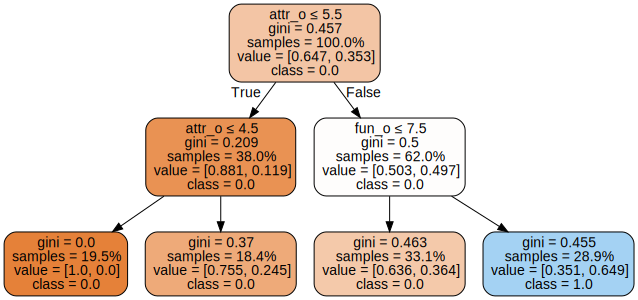

In [107]:
attributes_best = ['dec_o','attr_o','fun_o', 'shar_o','prob_o']
museum1 =museum1.loc[:, attributes_best]
museum1=museum1.dropna(axis=0, how='any')
X_n_e, y_n_e = museum1.drop(['dec_o'], axis=1), museum1['dec_o']
dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_n_e, y_n_e)


dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_n_e.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

The classes were the same but ginis got wrose instead. 

As we can see, even after further division of data into different sub groups based on the interest classifications, the results stays almost the same, execpt for minor race group who rated museum above 8.5. How attractive you were in your partner's perspective had the biggest impact on his/her decision of saying yes or no for both major and minor race groups. If your attractiveness score was high and you shared quite a few interests with your partner, then the chance of his/her saying yes was high. This was consistent with finding 1.